<a href="https://colab.research.google.com/github/dovele/personal-projects/blob/main/A_B_testing_Udacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: Data Science Fundamentals

## Sprint 2: Statistical Tests and Experiments

## Let's analyse Udacity A/B test!

<div><img style="height: 350px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3b/Udacity_logo.png" /></div>

## Concepts to explore

You will mostly focus on statistical hypothesis testing in this project on real-life data.

## Requirements

* Visualize 95% confidence interval between control and experiment groups on [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) metric. Explain what the confidence interval means, what's the relationship with the population of a group.
* Verify that the difference in each of the metrics between control and experiment groups is statistically significant using z-test, 95% confidence level.
* Verify that the difference in each of the metrics between control and experiment groups is statistically significant using t-test, 95% confidence level.
* Compare both test method results. Explain why they differ / do not differ that much and why.
* Choose 1 method (either z or t) and explore statistical significance of any metric under different confidence levels - 60%, 90%, 95%, 99%. If conclusions about significance differ under different confidence levels, explain why.
* Calculate p-values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
import scipy.stats as sp
from scipy.stats import norm
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

url_control = 'https://raw.githubusercontent.com/dovele/personal-projects/main/Udacity%20AB%20testing/Final%20Project%20Results%20-%20Control.csv'
url_exp = 'https://raw.githubusercontent.com/dovele/personal-projects/main/Udacity%20AB%20testing/Final%20Project%20Results%20-%20Experiment.csv'

control = pd.read_csv(url_control, index_col=0)
experiment = pd.read_csv(url_exp, index_col=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
control.head()

,Pageviews,Clicks,Enrollments,Payments
Date,,,,
"Sat, Oct 11",7723,687,134.0,70.0
"Sun, Oct 12",9102,779,147.0,70.0
"Mon, Oct 13",10511,909,167.0,95.0
"Tue, Oct 14",9871,836,156.0,105.0
"Wed, Oct 15",10014,837,163.0,64.0


In [3]:
control.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Sat, Oct 11 to Sun, Nov 16
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pageviews    37 non-null     int64  
 1   Clicks       37 non-null     int64  
 2   Enrollments  23 non-null     float64
 3   Payments     23 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.4+ KB


In [4]:
control["CTR_pct"] = (control["Clicks"] / control["Pageviews"]) * 100 #click-through rate - CTR - percentage
control["CAE_pct"] = (control["Enrollments"] / control["Clicks"]) * 100 #clicked and enrolled - CAE - percentage
control["EAP_pct"] = (control["Payments"] / control["Enrollments"]) * 100 # enrolled and paid - EAP - percentage
control["PAP_pct"] = (control["Payments"] / control["Clicks"]) * 100 #viewied the page and paid for course - PAP - percentage

control["CTR"] = (control["Clicks"] / control["Pageviews"]) #click-through rate - CTR - proportion
control["CAE"] = (control["Enrollments"] / control["Clicks"]) #clicked and enrolled - CAE - proportion
control["EAP"] = (control["Payments"] / control["Enrollments"]) # enrolled and paid - EAP - proportion
control["PAP"] = (control["Payments"] / control["Clicks"])  #viewied the page and paid for course - PAP - proportion
control["bin"] = "control"
control.head()

,Pageviews,Clicks,Enrollments,Payments,CTR_pct,CAE_pct,EAP_pct,PAP_pct,CTR,CAE,EAP,PAP,bin
Date,,,,,,,,,,,,,
"Sat, Oct 11",7723,687,134.0,70.0,8.895507,19.505095,52.238806,10.189229,0.088955,0.195051,0.522388,0.101892,control
"Sun, Oct 12",9102,779,147.0,70.0,8.558559,18.870347,47.619048,8.985879,0.085586,0.188703,0.476190,0.089859,control
"Mon, Oct 13",10511,909,167.0,95.0,8.648083,18.371837,56.886228,10.451045,0.086481,0.183718,0.568862,0.104510,control
"Tue, Oct 14",9871,836,156.0,105.0,8.469253,18.660287,67.307692,12.559809,0.084693,0.186603,0.673077,0.125598,control
"Wed, Oct 15",10014,837,163.0,64.0,8.358298,19.474313,39.263804,7.646356,0.083583,0.194743,0.392638,0.076464,control


In [5]:
experiment["CTR_pct"] = (experiment["Clicks"] / experiment["Pageviews"]) * 100 #click-through rate - CTR - percentage
experiment["CAE_pct"] = (experiment["Enrollments"] / experiment["Clicks"]) * 100 #clicked and enrolled - CAE - percentage
experiment["EAP_pct"] = (experiment["Payments"] / experiment["Enrollments"]) * 100 #enrolled and paid - EAP - percentage
experiment["PAP_pct"] = (experiment["Payments"] / experiment["Clicks"]) * 100 #viewied the page and paid for course - PAP - percentage

experiment["CTR"] = (experiment["Clicks"] / experiment["Pageviews"])  #click-through rate - CTR - proportion
experiment["CAE"] = (experiment["Enrollments"] / experiment["Clicks"])  #clicked and enrolled - CAE - proportion
experiment["EAP"] = (experiment["Payments"] / experiment["Enrollments"])  #enrolled and paid - EAP - proportion
experiment["PAP"] = (experiment["Payments"] / experiment["Clicks"])  #viewied the page and paid for course - PAP - proportion
experiment["bin"] = "experiment"

experiment.head()


,Pageviews,Clicks,Enrollments,Payments,CTR_pct,CAE_pct,EAP_pct,PAP_pct,CTR,CAE,EAP,PAP,bin
Date,,,,,,,,,,,,,
"Sat, Oct 11",7716,686,105.0,34.0,8.890617,15.306122,32.380952,4.956268,0.088906,0.153061,0.323810,0.049563,experiment
"Sun, Oct 12",9288,785,116.0,91.0,8.451766,14.777070,78.448276,11.592357,0.084518,0.147771,0.784483,0.115924,experiment
"Mon, Oct 13",10480,884,145.0,79.0,8.435115,16.402715,54.482759,8.936652,0.084351,0.164027,0.544828,0.089367,experiment
"Tue, Oct 14",9867,827,138.0,92.0,8.381474,16.686820,66.666667,11.124547,0.083815,0.166868,0.666667,0.111245,experiment
"Wed, Oct 15",9793,832,140.0,94.0,8.495864,16.826923,67.142857,11.298077,0.084959,0.168269,0.671429,0.112981,experiment


I added 4 columns - CTR, CAE, EAP, PAP, which are calculated from Pageviews, Clicks, Enrollments, Payments so that I could compare them as proportions (and columns CRT_pctm CAE_pct, EAP_pct, PAP_pct expressed in percent).

Bin column has the name of the group - control or experimental group.

In [6]:
df = pd.concat([control, experiment]).reset_index() #drop=True
df.head()

,Date,Pageviews,Clicks,Enrollments,Payments,CTR_pct,CAE_pct,EAP_pct,PAP_pct,CTR,CAE,EAP,PAP,bin
0,"Sat, Oct 11",7723,687,134.0,70.0,8.895507,19.505095,52.238806,10.189229,0.088955,0.195051,0.522388,0.101892,control
1,"Sun, Oct 12",9102,779,147.0,70.0,8.558559,18.870347,47.619048,8.985879,0.085586,0.188703,0.476190,0.089859,control
2,"Mon, Oct 13",10511,909,167.0,95.0,8.648083,18.371837,56.886228,10.451045,0.086481,0.183718,0.568862,0.104510,control
3,"Tue, Oct 14",9871,836,156.0,105.0,8.469253,18.660287,67.307692,12.559809,0.084693,0.186603,0.673077,0.125598,control
4,"Wed, Oct 15",10014,837,163.0,64.0,8.358298,19.474313,39.263804,7.646356,0.083583,0.194743,0.392638,0.076464,control


CTR has 37 rows for each of the groups (control and experiment) and other metrics (CAE, EAP, PAP) have 23 per group, because they are derrived from either Enrollments or Payments, which have 23 recorded rows.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         74 non-null     object 
 1   Pageviews    74 non-null     int64  
 2   Clicks       74 non-null     int64  
 3   Enrollments  46 non-null     float64
 4   Payments     46 non-null     float64
 5   CTR_pct      74 non-null     float64
 6   CAE_pct      46 non-null     float64
 7   EAP_pct      46 non-null     float64
 8   PAP_pct      46 non-null     float64
 9   CTR          74 non-null     float64
 10  CAE          46 non-null     float64
 11  EAP          46 non-null     float64
 12  PAP          46 non-null     float64
 13  bin          74 non-null     object 
dtypes: float64(10), int64(2), object(2)
memory usage: 8.2+ KB


### Confidence interval 95 % for Click-through-rate (CTR)

Let's look at the distribution of CTR in both groups.

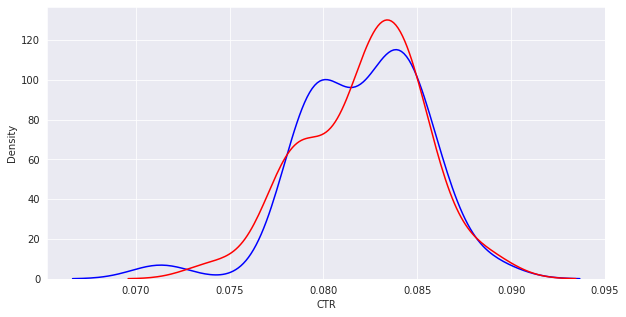

In [8]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.distplot(control.CTR, kde=True, hist = False, color='b');
sns.distplot(experiment.CTR, kde=True, hist = False, color='r');

Distribution in both groups is close to a normal distribution.

In [9]:
mean1 = control["CTR_pct"].mean()
sem1 = control["CTR_pct"].sem()
std1 = control["CTR_pct"].std()
stdp1 = control["CTR"].std()

print(mean1, sem1, std1, stdp1)

8.21292746965395 0.05308026419838648 0.32287464216427536 0.003228746421642753


In [10]:
mean2 = experiment["CTR_pct"].mean()
sem2 = experiment["CTR_pct"].sem()
std2 = experiment["CTR_pct"].std()
stdp2 = experiment["CTR"].std()

print(mean2, sem2, std2, stdp2)

8.219052099356418 0.051226311299777914 0.31159748693968137 0.003115974869396814


In [11]:
#MOE = z * sd/√n ; sem = sd/√n
MOE_control = 1.96 * sem1 #margin of error - MOE; z=1.96 (95% CI); sem - standard error of the mean
MOE_exp = 1.96 * sem2
print(MOE_control, MOE_exp)

0.1040373178288375 0.10040357014756471


After calculating mean CTR_pct in %, we can see that it is very similar in both groups.
Also calculated the margin of error using 1.96 (because that's the z score 95 % confidence interval).

Visualizing CTR_pct mean rates and CI at 95% of both groups:

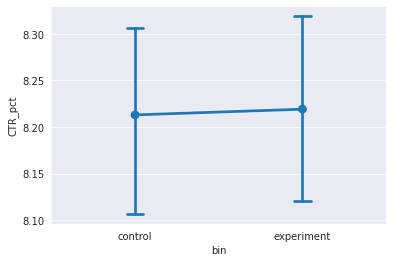

In [12]:
ax = sns.pointplot(x="bin", y="CTR_pct", data=df, ci=95, capsize=.1)

Confidence intervals are calculated by subtracting or adding MOE to the mean.

In [13]:
conf_interval_control = (mean1 - MOE_control, 
                         mean1 + MOE_control)

conf_interval_exp = (mean2 - MOE_exp,
                    mean2 + MOE_exp)

print('95% confidence interval for control group is:', conf_interval_control)
print('95% confidence interval for experiment group is:', conf_interval_exp)

95% confidence interval for control group is: (8.108890151825113, 8.316964787482787)
95% confidence interval for experiment group is: (8.118648529208853, 8.319455669503983)


The mean rate of both groups is almost the same.

Calculating a confidence interval from a sample let's you obtain a range for where the population parameter is likely to reside.

For 95% confidence interval, an average of 19 out of 20 contain the population parameter, in this case - click-though rate.

We can also calculate confidence interval for difference between sample proportions.



In [14]:
p_pool_c = control["Clicks"].sum() / control["Pageviews"].sum() #pooled proportion in control group CTR
p_pool_e = experiment["Clicks"].sum() / experiment["Pageviews"].sum() #pooled proportion in experimental group CTR

In [15]:
p_pool_dif = p_pool_e - p_pool_c
print(p_pool_dif)

5.662709158693602e-05


In [16]:
#pooled standart error for difference CI ; SEpooled = √p(1-p)*(1/n+1/n)
xp = (1-p_pool_dif)
xn = 1/37 + 1/37
se_pool = math.sqrt(p_pool_dif * xp * xn)
se_pool


0.001749500082408631

In [17]:
stdp1 = control["CTR"].std() #SD of CRT proportions in control group
stdp2 = experiment["CTR"].std() #SD of CRT proportions in experiment group

In [18]:
var1 = stdp1**2 #var - sample variance
var2 = stdp2**2
var_dif = (var1/37)+(var2/37)
std_dif = math.sqrt(var_dif)

print(std_dif, var_dif)

0.0007376753633375771 5.441649416752263e-07


In [19]:
x = [var_dif]
y = [1]

n_root = math.sqrt(37)

MOE_dife =1.96 * se_pool
MOE_dife

0.003429020161520917

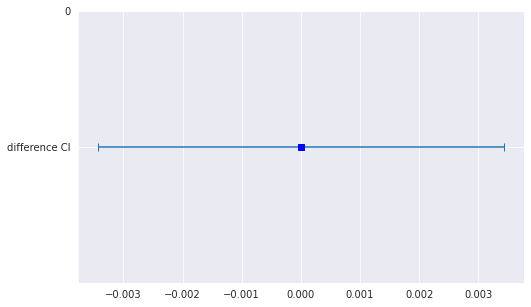

In [20]:
#error bar
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
plt.errorbar(x, y, xerr=MOE_dife, capsize=4, linestyle='None', marker ='s', 
             markersize=6, mfc='b', mec='b' )
plt.yticks((0,1,2), ('', 'difference CI', '0'))
plt.show()

Since the difference confidence interval involves 0, 
it indicates that differences between groups are not significant.

# Z test, 95% confidence level

* click-through rate - CTR
* clicked and enrolled - CAE
* enrolled and paid - EAP
* viewed the page and paid for course - PAP

## Calculating z-test for click-through rates (CTR)

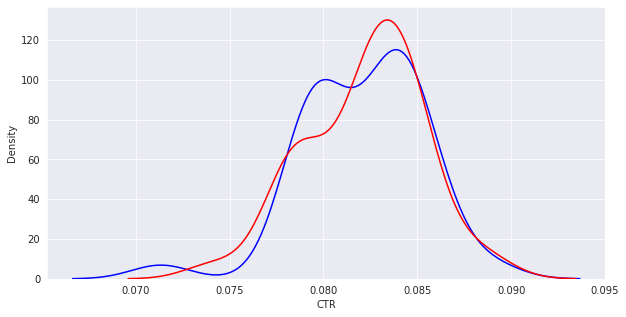

In [21]:
control_CTR = df[df['bin'] == 'control'].CTR
exp_CTR = df[df['bin'] == 'experiment'].CTR

plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.distplot(control.CTR, kde=True, hist = False, color='b');
sns.distplot(experiment.CTR, kde=True, hist = False, color='r');

In [22]:
ztest_CTR = sm.stats.ztest(control_CTR, exp_CTR) 

## Calculating z-test for clicked and enrolled rates (CAE), distribution

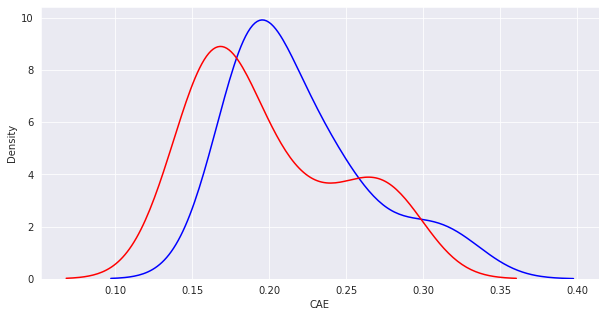

In [23]:
control_CAE = df[df['bin'] == 'control'].dropna()['CAE'] #dropna, because Enrollments, Payments have NAN values
exp_CAE = df[df['bin'] == 'experiment'].dropna()['CAE']

plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.distplot(control.CAE, kde=True, hist = False, color='b');
sns.distplot(experiment.CAE, kde=True, hist = False, color='r');

In [24]:
ztest_CAE = sm.stats.ztest(control_CAE, exp_CAE)

## Calculating z-test for enrolled and paid rates (EAP), distribution

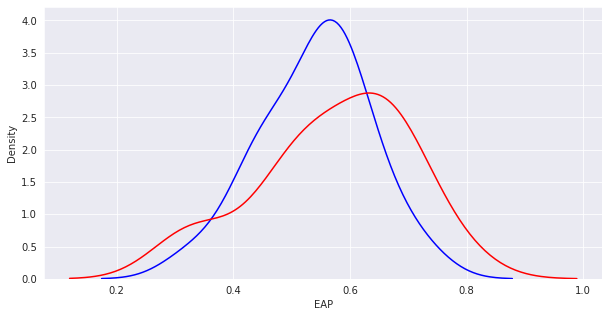

In [25]:
control_EAP = df[df['bin'] == 'control'].dropna()['EAP'] #dropna, because Enrollments, Payments have NAN values
exp_EAP = df[df['bin'] == 'experiment'].dropna()['EAP']

plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.distplot(control.EAP, kde=True, hist = False, color='b');
sns.distplot(experiment.EAP, kde=True, hist = False, color='r');

In [26]:
ztest_EAP = sm.stats.ztest(control_EAP, exp_EAP)

## Calculating z-test for viewed the page and paid for course rates (PAP), distribution

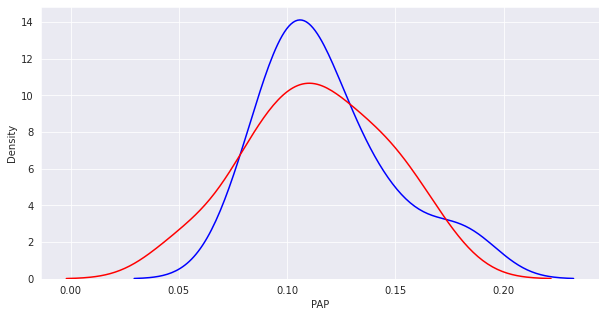

In [27]:
control_PAP = df[df['bin'] == 'control'].dropna()['PAP'] #dropna, because Enrollments, Payments have NAN values
exp_PAP = df[df['bin'] == 'experiment'].dropna()['PAP']

plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.distplot(control.PAP, kde=True, hist = False, color='b');
sns.distplot(experiment.PAP, kde=True, hist = False, color='r');

In [28]:
ztest_PAP = sm.stats.ztest(control_PAP, exp_PAP)

In [29]:
print('CTR test statistic and p-value:', ztest_CTR, '-------------',
      'CAE test statistic and p-value:', ztest_EAP, '-------------',
      'EAP test statistic and p-value:', ztest_EAP, '-------------',
      'PAP test statistic and p-value:', ztest_PAP, sep='\n')

CTR test statistic and p-value:
(-0.08302608446561602, 0.9338307988101843)
-------------
CAE test statistic and p-value:
(-1.0081408912731535, 0.3133868293614658)
-------------
EAP test statistic and p-value:
(-1.0081408912731535, 0.3133868293614658)
-------------
PAP test statistic and p-value:
(0.5387777625331603, 0.590040209403962)


Null hypothesis proposes that there is no difference between certain characteristics of a population or data-generating process.
The alternative hypothesis proposes that there is a difference.

If the P-value is less than (or equal to) alpha, then the null hypothesis is rejected in favor of the alternative hypothesis. And, if the P-value is greater than alpha, then the null hypothesis is not rejected. 

In this case alpha = 0.05 and our p-values are greater, so null hypothesis is not rejected, but it does not prove the null hypothesis - the observed differences are explainable by chance alone.

### T-test, 95% confidence level

In [30]:
ttest_CTR = sp.stats.ttest_ind(control.dropna()['CTR'], experiment.dropna()['CTR']) 

In [31]:
ttest_CAE = sp.stats.ttest_ind(control.dropna()['CAE'], experiment.dropna()['CAE'])

In [32]:
ttest_EAP = sp.stats.ttest_ind(control.dropna()['EAP'], experiment.dropna()['EAP'])

In [33]:
ttest_PAP = sp.stats.ttest_ind(control.dropna()['PAP'], experiment.dropna()['PAP'])

T test for mean based on normal distribution, two samples.


In [34]:
print('CTR:', ttest_CTR, '-------------',
      'CAE:', ttest_EAP, '-------------',
      'EAP:', ttest_EAP, '-------------',
      'PAP:', ttest_PAP, sep='\n')

CTR:
Ttest_indResult(statistic=-0.1578410553218371, pvalue=0.8753042062698937)
-------------
CAE:
Ttest_indResult(statistic=-1.0081408912731535, pvalue=0.3188989662061842)
-------------
EAP:
Ttest_indResult(statistic=-1.0081408912731535, pvalue=0.3188989662061842)
-------------
PAP:
Ttest_indResult(statistic=0.5387777625331603, pvalue=0.5927558614268024)


T-test and z-test results do not differ much. T-test is more suitable for small sample sizes and z test is better for larger sample sizes, but in this case both are appropriate for CTR calculation, because the sample is larger than 30. But for other metrics t test is better, because sample sizes are 23 (less than 30).

### Clicked-and-enrolled differences between groups at different confidence levels - 60%, 90%, 95%, 99% - using t-test. 

In [35]:
p1 = control["Enrollments"].sum() / control["Clicks"].sum() #proportion in control group CAE
p2 = experiment["Enrollments"].sum() / experiment["Clicks"].sum() # proportion in experimental group CAE
p = df["Enrollments"].sum()/df["Clicks"].sum()
print(p1, p2, p)

0.13337796884910846 0.12084730803177406 0.127118494612278


In [36]:
# z formula: z =(p1-p2)/sqrt((p(1-p))(1/n1+1/n2))
pp = (0.1271 * 0.8729) #(p(1-p)
nn = 1/23 + 1/23 #(1/n1+1/n2)
xx= math.sqrt(pp * nn) 
z =(p1-p2)/xx

z

0.12757567437334685

In [37]:
# z score from the table is 0.1020
pvalue=0.10204*2
pvalue

0.20408

In [38]:
if pvalue < 0.4:
    print("CAE rate differs significantly at 60 % confidence level")

CAE rate differs significantly at 60 % confidence level


In [39]:
if pvalue < 0.1:
    print("CAE rate differs significantly at 90 % confidence level")
elif pvalue >= 0.1:
    print("CAE rate DOES NOT differ significantly at 95 % confidence level")

CAE rate DOES NOT differ significantly at 95 % confidence level


In [40]:
if pvalue < 0.05:
    print("CAE rate differs significantly 95 % confidence level")
elif pvalue >= 0.05:
    print("CAE rate DOES NOT differ significantly at 95 % confidence level")

CAE rate DOES NOT differ significantly at 95 % confidence level


In [41]:
if pvalue < 0.01:
    print("CAE rate differs significantly significant at 99 % confidence level")
elif pvalue >= 0.01:
    print("CAE rate DOES NOT differ significantly at 99 % confidence level")

CAE rate DOES NOT differ significantly at 99 % confidence level


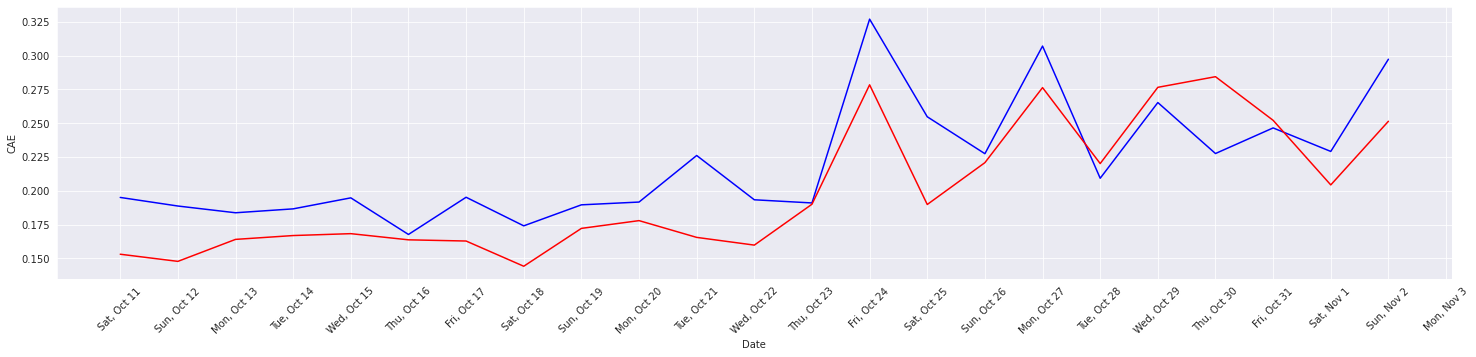

In [42]:
plt.figure(figsize=(25,5))
sns.set_style("darkgrid")
sns.lineplot(x=control.index, y="CAE", data=control, color="blue")
sns.lineplot(x=experiment.index, y="CAE", data=experiment, color="red")
plt.xticks(rotation=45);

Overall, control group has higher CAE rate. It differs significantly between groups at 60%
confidence levels, but the difference is not significant at  90%, 95% and 99% confidence levels.

It is better to trust higher confidence level results, because they explain more of the data. In this case, probably whatever the changes were for the experimental group, it did not make a huge difference for CAE rates to Udacity courses (looking at 90%, 95% and 99% confidence intervals).

For 95% confidence interval, an average of 19 out of 20 contain the population parameter (in this case - clicked-and-enrolled metric).